### Week 5 - Plotting with Matplotlib, Pandas and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

___

### The Foundations of Plotting

Plotting is immensely useful because humans are visual creatures.
<br>
"A picture is worth a thousand words" - Henrik Ibsen

The most common plots you see are likely:
<ol> 
    <li> Scatterplots</li>
    <li> Lineplots </li>
    <li> Barplots</li>
    <li> Histograms</li>
</ol>

In Python (especially for data analysis), there are three main ways to plot:
<ol>
<li> Matplotlib - Low level but allows for a lot of customization. </li>
<li> Pandas - Quick and easy but low customization. </li>
<li> Seaborn - Quick and variable in customization. </li>
</ol>

Note however, that pandas and seaborn are built using matplotlib just like how pandas uses numpy under the hood.

Plots are automatically deleted unless we save a reference to it - i.e. setting it into a variable. This is so that we can free up memory. This means that if you don't save your plot, you will have to rerun the code to change something about it.

### Matplotlib

#### Quick Demonstration

plt.plot(x, y, '[marker][linestyle][color']')

Examples for the style format string:
<ul>
    <li>'--k'= dashed black line</li>
    <li>'or' = circles that are red</li>
    <li>'x-.c' = x's that are dot-dashed lines that are cyan</li>
    <li>'o-g' = green solid line with circles</li>
    
    
    
</ul>

In [ ]:
#Saving a plot: plt.savefig()
#Only works if you enter this command before plt.show()

#### Plot Components

Recall that we said "everything in python is an object". In Pandas, we were using objects of the class Series and DataFrames. Similarly, matplotlib has a Figure class, Axes class, and additional plot classes like lines and ticks.

<br>

Figure objects contain axes objects and many other plot objects.

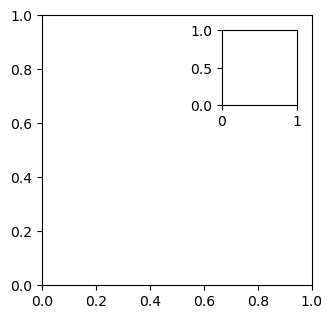

In [3]:
fig = plt.figure(figsize=(3, 3))                   #create a figur.  size is 3 x 3.  set to fig. 
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])
plt.show()


#subplots function
#fig, axes = plt.subplots(1, 2, figsize=(10, 8)) #figsize is width and height counted in inches




#.add_gridspec() method


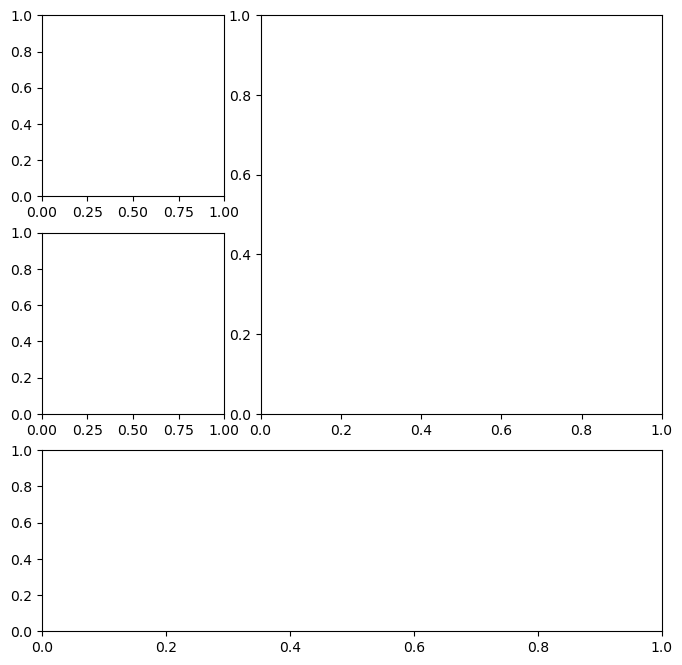

In [4]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2, :])


#fig.savefig('file_path.png')

In [ ]:
#on rcparams (default dictionary for plotting options) - advanced

### Starting our Data Analysis

In [2]:
dates = pd.read_csv('speed_dates.csv', encoding="ISO-8859-1")
dates.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
'music' in dates.columns   #Check if 'music' is a column in the 'dates' DataFrame.


True

In [3]:
#note.  here are over 195 columns, we cant see them all 

dates.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [6]:
#Drop all columns that end in 2 or 3. These are followup surveys that we are not interested in.
#Create a list of columns in the 'dates' DataFrame that don't start with '2' or '3' when reversed.
use_cols = [col for col in dates.columns if not (col[::-1].startswith('2') or col[::-1].startswith('3') )]
dates = dates[use_cols]
dates.shape

(8378, 122)

#### Questions to ask:
<ol>
<li> Does self confidence matter? </li>
<li> Do preferences between men and women differ? </li>
<li> Which attributes seem to be the most important for dating? </li>
<li> Which hobbies are highly correlated with success? </li>
</ol>



___

### Exploration of the Data

In [8]:
dates.head() #explain why it looks like this

#Explain the groupby code

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,length,you_call,them_cal
0,1,1.0,0,1,1,1,10,7,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0


#### Demographics of our Sample

In [7]:
#note -- this is a dataframe 

type(dates.loc[dates.gender==0, ['iid', 'age']].
groupby('iid').max())


pandas.core.frame.DataFrame

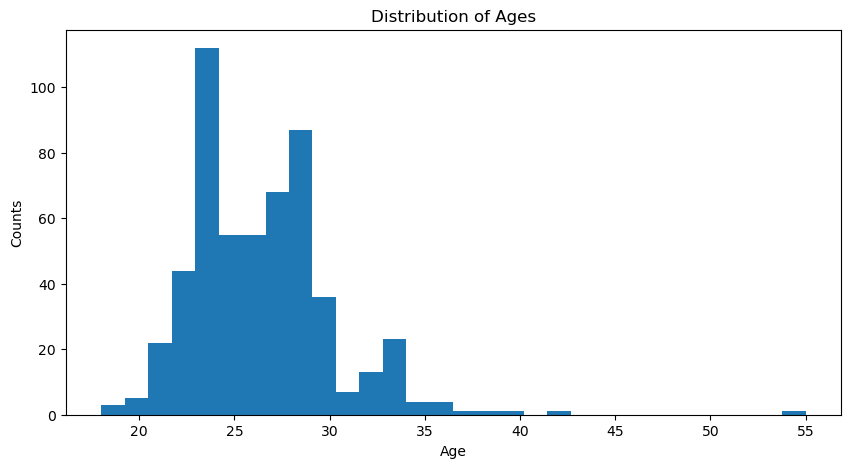

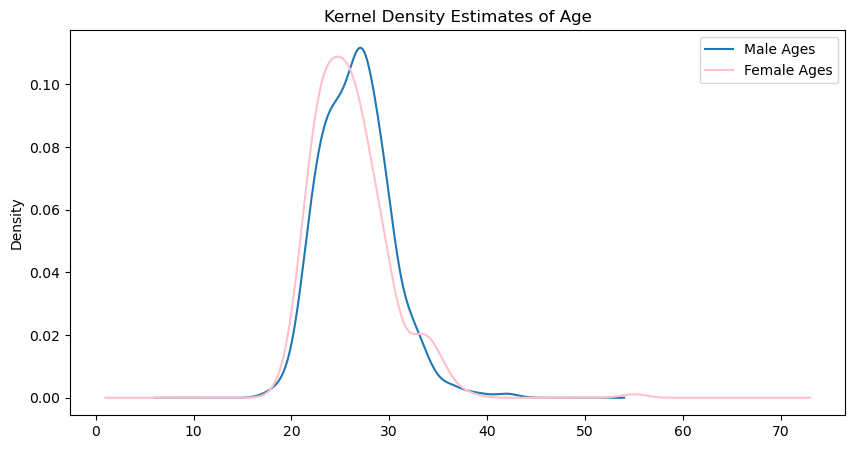

In [9]:
#Histogram of ages

#Use of plt API
fig, ax = plt.subplots(1, 1, figsize=(10, 5))   #fig is figure, ax is axis 
ages = dates[['iid', 'age']].groupby('iid').max()  #groupby is used for aggregation.  age = only IID and AGE columns
plt.hist(x=ages, bins=30)
plt.ylabel('Counts')
plt.xlabel('Age')
plt.title('Distribution of Ages')
plt.show()


#Use of the pandas plotting method

#Can we superimpose the one for males and females?
fig, ax = plt.subplots(1, 1, figsize=(10, 5))  #10 = width 5 = height 

#Plot the male age kde
(dates.loc[dates.gender==1, ['iid', 'age']].
groupby('iid').max().plot(kind='kde', ax=ax, title='Male Age'))

#Plot the female age kde
(dates.loc[dates.gender==0, ['iid', 'age']].
groupby('iid').max().plot(kind='kde', ax=ax, color='pink', label='Female Age'))

#Notice that it is plotted on the same axis.

ax.legend(['Male Ages', "Female Ages"])
plt.title("Kernel Density Estimates of Age")

plt.show()


In [14]:
dates.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,length,you_call,them_cal
0,1,1.0,0,1,1,1,10,7,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0


In [15]:
#Boxplot comparing the confidence of guys vs girls
#Guys rating themselves vs girls rating themselves


#Attributes suffixed by 3_1 are answers to the question:
#"How do you think you measure up? Please rate your opinion of your own attributes on a scale of 1-10."

attributes = ['attr', 'sinc', 'intel', 'fun', 'amb']
personal_m_cols = [attribute + '3_1' for attribute in attributes]

#Example of chaining
(dates[['gender', 'iid'] + personal_m_cols].
 groupby('iid').
 max().
 groupby('gender').
 mean())
 



,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
gender,,,,,
0,7.242537,8.470149,8.294776,7.899254,7.630597
1,6.945255,8.105839,8.474453,7.507299,7.525547


In [16]:
#Helper function
def find_mode(x):
    #Return the mode of a series
    result = x.mode().squeeze()
    if isinstance(result, pd.Series):
        return None
    else:
        return result


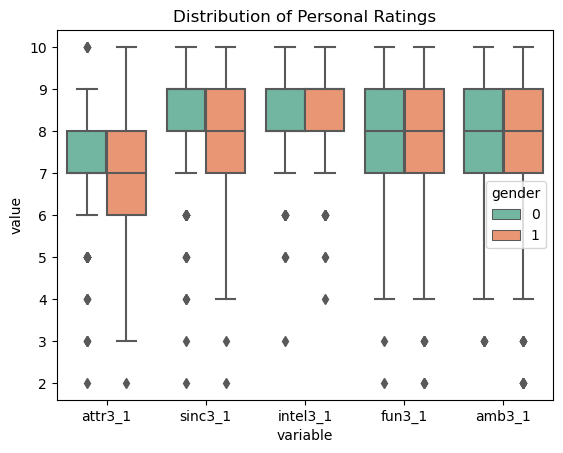

In [17]:
#You can do more complicated plots using seaborn -- dont worry about this yet, this is more complicated and will use later
personal_melted = pd.melt(dates.loc[: , ['iid', 'gender'] + personal_m_cols].dropna().groupby(by='iid').agg(find_mode),
                          id_vars='gender')


palette_1 = sns.color_palette("husl", 9)
palette_2 = sns.color_palette("Set2")

sns.boxplot(x='variable', y='value', hue='gender', data=personal_melted, palette=palette_2)
plt.title('Distribution of Personal Ratings')
plt.show()


___

### Counts/Frequencies

C:\Users\franc\AppData\Local\Temp\ipykernel_14060\3990932026.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_interest_ratings = dates.groupby('iid').mean().loc[:, interest_cols].mean(axis=0)


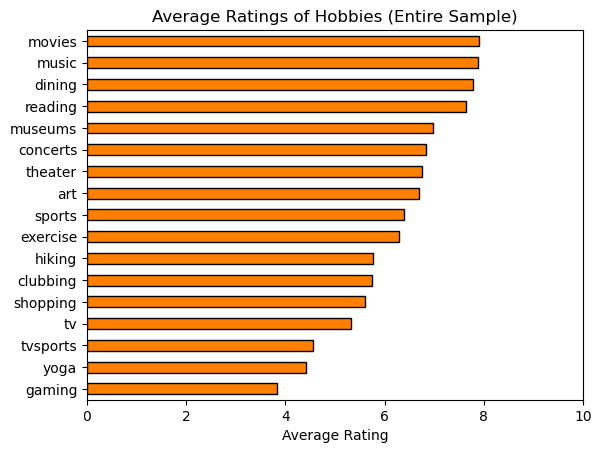

In [21]:

#For each interest, lets see how people rated them
interest_cols = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

average_interest_ratings = dates.groupby('iid').mean().loc[:, interest_cols].mean(axis=0)
average_interest_ratings.sort_values().plot(kind='barh', color='#FF8000', edgecolor='black') #using the builtin plot method

#Notice that I plotted using pandas and am customizing the plot using plt
plt.xlim(0, 10)
plt.xlabel('Average Rating')
plt.title('Average Ratings of Hobbies (Entire Sample)')
plt.show()


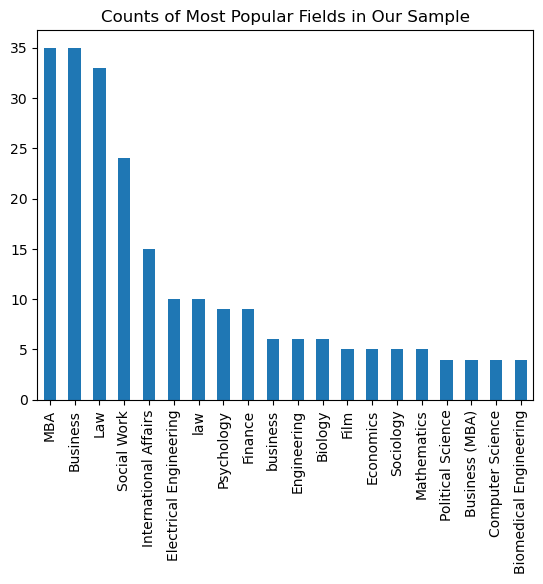

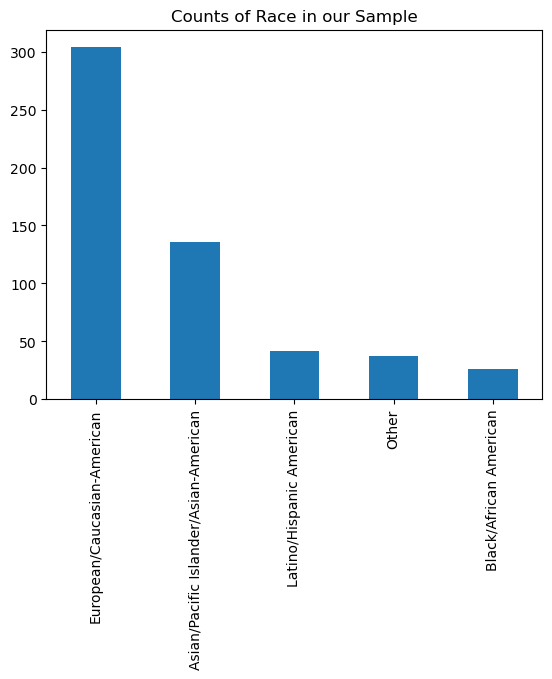

In [23]:
dates[['iid', 'field']].groupby(by='iid').agg(find_mode).field.value_counts()[0:20].plot(kind='bar')
plt.title('Counts of Most Popular Fields in Our Sample')
plt.show()


#and finally by race
race_map = {1: 'Black/African American',
            2: 'European/Caucasian-American',
            3: 'Latino/Hispanic American',
            4: 'Asian/Pacific Islander/Asian-American',
            5: 'Native American',
            6: 'Other'}


temp = dates[['iid', 'race']].groupby(by='iid').agg(find_mode).race

def temp_convert(x):
    return x if x in [1, 2, 3, 4, 5, 6] else None

temp.apply(temp_convert).map(race_map).value_counts().plot(kind='bar')
plt.title('Counts of Race in our Sample')
plt.show()



### Question 1: Does Self-confidence Matter?

We are going to make a new variable per person. This will be called success rate (which equals the amount of matches / the total amount of dates this person went on). 
<br>

We will also create another variable called self-confidence. It will be the average of one's own scores of the six attributes. We will then look at graphs to get a feel for the relationship between these two variables.



In [28]:
#For each person, let's calculate their success rates


#round=how many people they met
#dec_o = the decision of their partner that night
#dec = their decision that night
#match = if they both matched

profiles = dates.groupby(by='iid').agg({
            'round' : np.max,
            'dec_o' : np.sum,
            'dec': np.sum,
            'match' : np.sum
        }).reset_index()

#assign create a new dataframe 
profiles = profiles.assign(
    positive_rate = profiles.dec_o / profiles['round'], #how many people are interested in that round?
    match_rate = profiles.match / profiles['round'], #how many matches did this person get in that round?
    hit_rate = profiles.match / profiles.dec #how many matches did this person get out of those he/she liked?
)


In [29]:
profiles

,iid,round,dec_o,dec,match,positive_rate,match_rate,hit_rate
0,1,10,5,8,4,0.500000,0.400000,0.500000
1,2,10,6,4,2,0.600000,0.200000,0.500000
2,3,10,5,0,0,0.500000,0.000000,NaN
3,4,10,6,3,2,0.600000,0.200000,0.666667
4,5,10,3,6,2,0.300000,0.200000,0.333333
...,...,...,...,...,...,...,...,...
546,548,22,10,9,5,0.454545,0.227273,0.555556
547,549,22,10,9,5,0.454545,0.227273,0.555556
548,550,22,6,7,4,0.272727,0.181818,0.571429
549,551,22,10,8,2,0.454545,0.090909,0.250000


In [30]:
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb']

other_ratings = dates[['iid'] + [att + '_o' for att in attributes]].groupby(by='iid').mean().reset_index()
profiles = profiles.merge(other_ratings, how='left', on='iid')
profiles


,iid,round,dec_o,dec,match,positive_rate,match_rate,hit_rate,attr_o,sinc_o,intel_o,fun_o,amb_o
0,1,10,5,8,4,0.500000,0.400000,0.500000,6.700000,7.400000,8.000000,7.200000,8.000000
1,2,10,6,4,2,0.600000,0.200000,0.500000,7.700000,7.100000,7.900000,7.500000,7.500000
2,3,10,5,0,0,0.500000,0.000000,NaN,6.500000,7.100000,7.300000,6.200000,7.111111
3,4,10,6,3,2,0.600000,0.200000,0.666667,7.000000,7.100000,7.700000,7.500000,7.700000
4,5,10,3,6,2,0.300000,0.200000,0.333333,5.300000,7.700000,7.600000,7.200000,7.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,548,22,10,9,5,0.454545,0.227273,0.555556,6.857143,5.809524,6.666667,5.714286,6.150000
547,549,22,10,9,5,0.454545,0.227273,0.555556,6.350000,6.650000,6.850000,6.650000,6.000000
548,550,22,6,7,4,0.272727,0.181818,0.571429,5.136364,5.818182,6.500000,5.272727,6.363636
549,551,22,10,8,2,0.454545,0.090909,0.250000,6.142857,6.666667,6.761905,5.571429,6.238095


In [31]:
#Now we would like to make a confidence column. This is their total score of themselves - the _o columns in profile
self_score = dates[['iid'] + [att + '3_1' for att in attributes]].groupby('iid').max().sum(axis=1).reset_index()
profiles = profiles.merge(self_score, how='left', on='iid')
profiles.head()

,iid,round,dec_o,dec,match,positive_rate,match_rate,hit_rate,attr_o,sinc_o,intel_o,fun_o,amb_o,0
0,1,10,5,8,4,0.5,0.4,0.500000,6.7,7.4,8.0,7.2,8.000000,37.0
1,2,10,6,4,2,0.6,0.2,0.500000,7.7,7.1,7.9,7.5,7.500000,33.0
2,3,10,5,0,0,0.5,0.0,NaN,6.5,7.1,7.3,6.2,7.111111,42.0
3,4,10,6,3,2,0.6,0.2,0.666667,7.0,7.1,7.7,7.5,7.700000,39.0
4,5,10,3,6,2,0.3,0.2,0.333333,5.3,7.7,7.6,7.2,7.800000,33.0


In [32]:
profiles = profiles.rename(columns={0: 'self_score'})

#profiles
profiles = profiles.assign(
    other_score = lambda x : x.attr_o + x.sinc_o + x.intel_o + x.fun_o + x.amb_o,
    confidence = lambda x: x.self_score - x.other_score   #what they rated themselves + what others rated them
)
profiles.head()

,iid,round,dec_o,dec,match,positive_rate,match_rate,hit_rate,attr_o,sinc_o,intel_o,fun_o,amb_o,self_score,other_score,confidence
0,1,10,5,8,4,0.5,0.4,0.500000,6.7,7.4,8.0,7.2,8.000000,37.0,37.300000,-0.300000
1,2,10,6,4,2,0.6,0.2,0.500000,7.7,7.1,7.9,7.5,7.500000,33.0,37.700000,-4.700000
2,3,10,5,0,0,0.5,0.0,NaN,6.5,7.1,7.3,6.2,7.111111,42.0,34.211111,7.788889
3,4,10,6,3,2,0.6,0.2,0.666667,7.0,7.1,7.7,7.5,7.700000,39.0,37.000000,2.000000
4,5,10,3,6,2,0.3,0.2,0.333333,5.3,7.7,7.6,7.2,7.800000,33.0,35.600000,-2.600000


Text(0.5, 1.0, 'Positive Rate vs. Confidence Score')

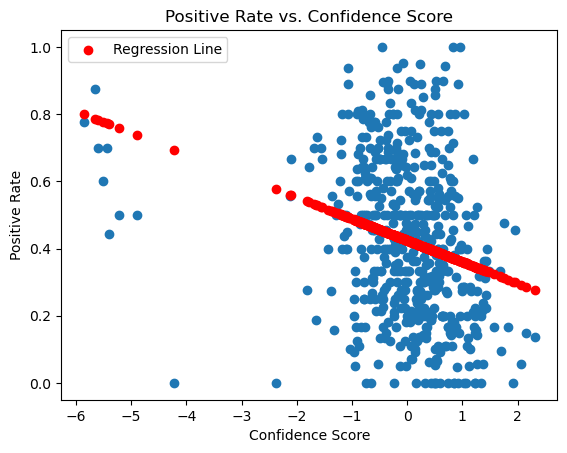

In [34]:
#Plot positive_rate vs confidence
x = (profiles.confidence - profiles.confidence.mean())/profiles.confidence.std() #standardization
y = profiles.positive_rate

plt.scatter(x=x, y=y) #plt.scatter
plt.xlabel("Confidence Score")
plt.ylabel("Positive Rate")
#Can we put a regression line in it?
m, b = np.polyfit(x, y, deg=1)


#Add linear regression line to scatterplot 
plt.scatter(x, m*x + b, color='red', label='Regression Line')
plt.legend()
plt.title('Positive Rate vs. Confidence Score')


#Annotation on our graph

Interesting?...

___

### Q2: Are Perceptions of Attractiveness in Line with Reality?

Men may assume that certain attributes are important to women and vice versa. Are their perceptions correct?


From the data dictionary, we know that attributes suffixed with '2_1' are answers to the question: "What do you think the opposite sex looks for in a date?" and those suffixed with '1_1' are answers to "Please rate the importance of the following attributes in a potential date".
<br>

There was a change in methodology during waves 6, 7, 8, 9 so we exclude these from our data to keep the data standard.


In [35]:
#Suffix with 2_1 deontes perceptions on what they opposite gender seeks
#1_1 is what particular answerer seeks (from the viewpoint of the opposite sex)


#For male perceptions on what females seek, we would compare 2_1 males vs 1_1 females
temp_dates = dates[~dates.wave.isin([6, 7, 8, 9])] #temporary variable


#Male perceptions of what females look for in men
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
male_perc_attr = [attr + '2_1' for attr in attributes]
female_actual_attr = [attr + '1_1' for attr in attributes]

#Filtering and finding averages
male_perc = temp_dates.loc[temp_dates.gender == 1,  male_perc_attr].mean()
female_act = temp_dates.loc[temp_dates.gender == 0,  female_actual_attr].mean()


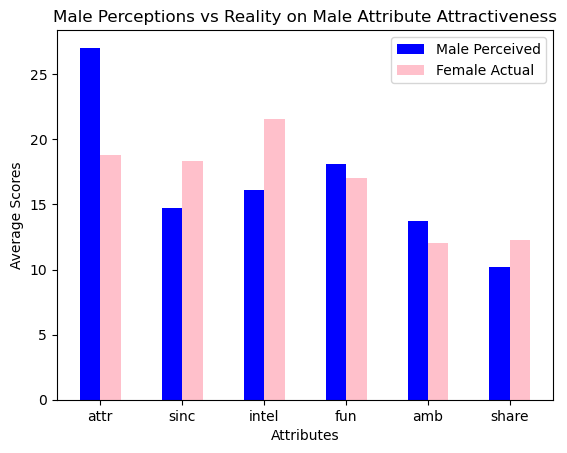

In [36]:
#Creating the correct parameters for our x axis
n=len(male_perc)
r = np.arange(n)
width = 0.25
  

plt.bar(r, male_perc, color = 'b', width = width, label='Male Perceived')
plt.bar(r + width, female_act, color = 'pink', width = width, label='Female Actual')
  
plt.xlabel("Attributes")
plt.ylabel("Average Scores")
plt.title("Male Perceptions vs Reality on Male Attribute Attractiveness")
  
plt.xticks(r + width/2,['attr', 'sinc', 'intel', 'fun', 'amb', 'share'])
plt.legend()
  
plt.show()

#we can plot also the differences next to it

In [37]:
#We take a look at the same but with the genders switched
#Female perceptions in what males are seeking

#Set up relevant column names
female_perc_attr = [attr + '2_1' for attr in attributes]
male_actual_attr = [attr + '1_1' for attr in attributes]

#Averaging the attributes using masking and aggregation
female_perc = temp_dates.loc[temp_dates.gender == 0,  female_perc_attr].mean()
male_act = temp_dates.loc[temp_dates.gender == 1,  male_actual_attr].mean()




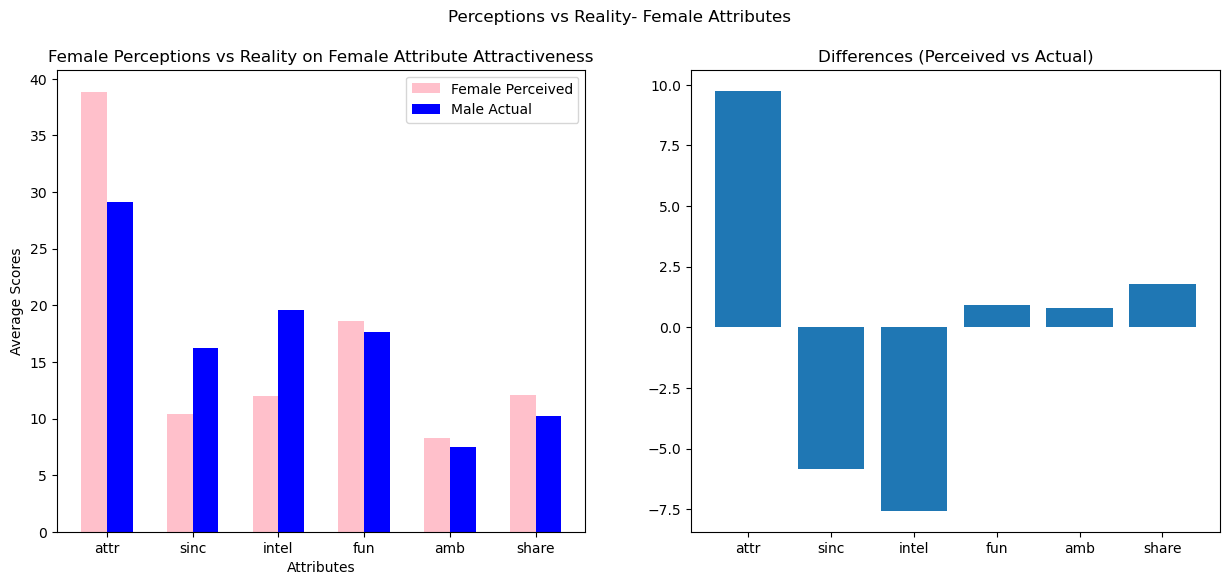

In [38]:
#Subplotting example
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 =one row 2 = two columns

n=6
r = np.arange(n)
width = 0.3
  
#Notice that instead of calling plt like we did two code chunks above, we can use methods on the axis objects
ax[0].bar(r, female_perc, color = 'pink',
        width = width, 
        label='Female Perceived')
ax[0].bar(r + width, male_act, color = 'b',
        width = width,
        label='Male Actual')
  
ax[0].set_xlabel("Attributes")
ax[0].set_ylabel("Average Scores")
ax[0].set_title("Female Perceptions vs Reality on Female Attribute Attractiveness")
ax[0].set_xticks(r + width/2,['attr', 'sinc', 'intel', 'fun', 'amb', 'share'])
ax[0].legend()


#and the differences on the second plot

ax[1].bar(['attr', 'sinc', 'intel', 'fun', 'amb', 'share'], female_perc.values-male_act.values)
ax[1].set_title("Differences (Perceived vs Actual)")
plt.suptitle('Perceptions vs Reality- Female Attributes')
plt.show()

#we can plot also the differences next to it

### Q3: Which qualities are the most attractive?

In the simple case of one regressor (variable) against y, we have that:
<br>
<br>
<center>$R^2 = r^2 = Corr(x,y)^2$</center>

In [39]:
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb']
#Correlation matrix 
profiles[['positive_rate', 'hit_rate'] + [att + '_o' for att in attributes]].corr()

,positive_rate,hit_rate,attr_o,sinc_o,intel_o,fun_o,amb_o
positive_rate,1.000000,0.784545,0.790086,0.248461,0.266008,0.653968,0.283412
hit_rate,0.784545,1.000000,0.677803,0.178098,0.197774,0.528227,0.253360
attr_o,0.790086,0.677803,1.000000,0.300303,0.275789,0.690931,0.321143
sinc_o,0.248461,0.178098,0.300303,1.000000,0.645820,0.378054,0.350582
intel_o,0.266008,0.197774,0.275789,0.645820,1.000000,0.360652,0.656056
fun_o,0.653968,0.528227,0.690931,0.378054,0.360652,1.000000,0.457329
amb_o,0.283412,0.253360,0.321143,0.350582,0.656056,0.457329,1.000000


Text(0.5, 1.0, 'Correlations of Attributes and Success Rates')

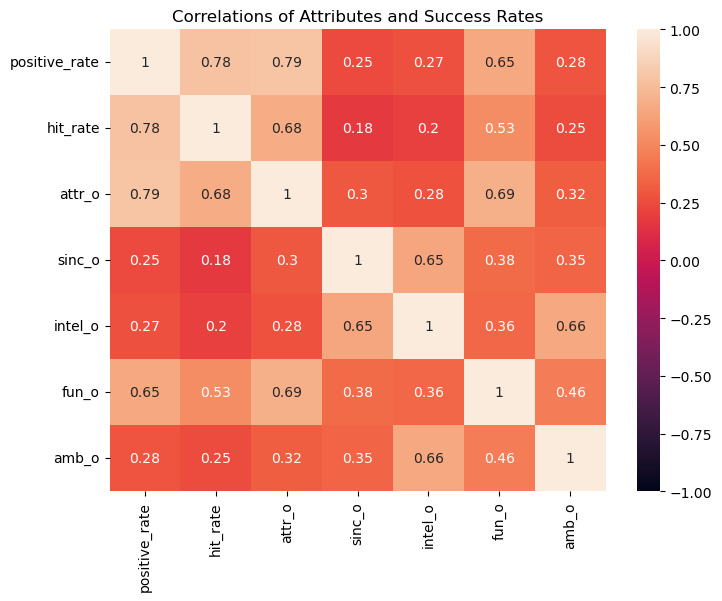

In [40]:
#Make a heatmap with it
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(profiles[['positive_rate', 'hit_rate'] + [att + '_o' for att in attributes]].corr(),
            vmin=-1,
            vmax=1,
            annot=True
)
plt.title('Correlations of Attributes and Success Rates')

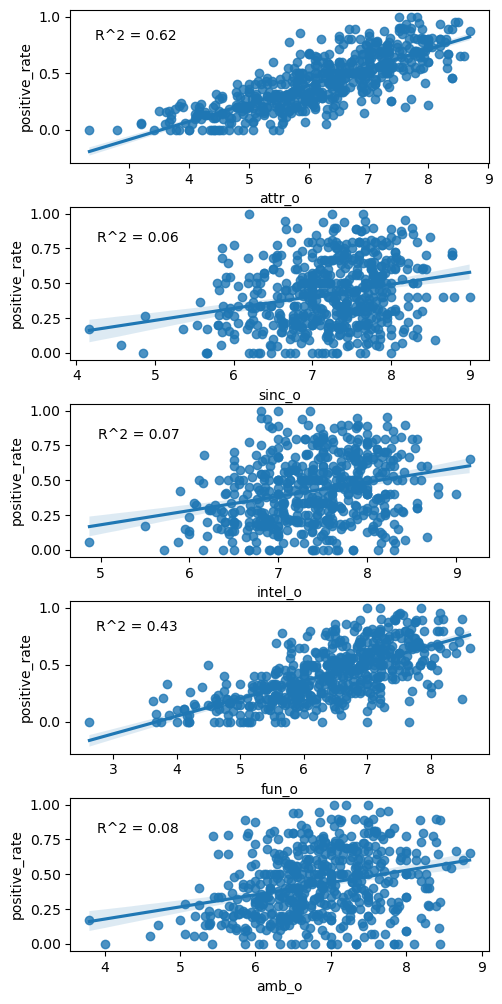

In [41]:
#Regression Plots
fig, ax = plt.subplots(5, 1, figsize=(5, 10))
fig.tight_layout()
for i, attr in enumerate([attr + '_o' for attr in attributes]):
    sns.regplot(x=attr, y='positive_rate', ax=ax[i], data=profiles)
    ax[i].set_xlabel(attr)
    r_squared = np.round(np.corrcoef(profiles.positive_rate, profiles[attr])[0][1]**2,2)   #uses 𝑅2=𝑟2=𝐶𝑜𝑟𝑟(𝑥,𝑦)2 as calculation
    x_pos = profiles[attr].min() + 0.1
    ax[i].annotate(f"R^2 = {r_squared}", (x_pos, 0.8))
    
    
    

### Q4: Which Interests are the most Attractive?

Including hobbies and fields.

In [42]:
#For hobbies: For each hobby, we can regress the positive score against the rating
interest_cols = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']


In [43]:
interests = dates[['iid'] + interest_cols].groupby('iid').max().reset_index()
interests = interests.merge(profiles[['iid', 'positive_rate']], on='iid', how='left').dropna()   #profiles is the df.  

#notes -- each person has rated their interest in a hobby (above)

<Axes: >

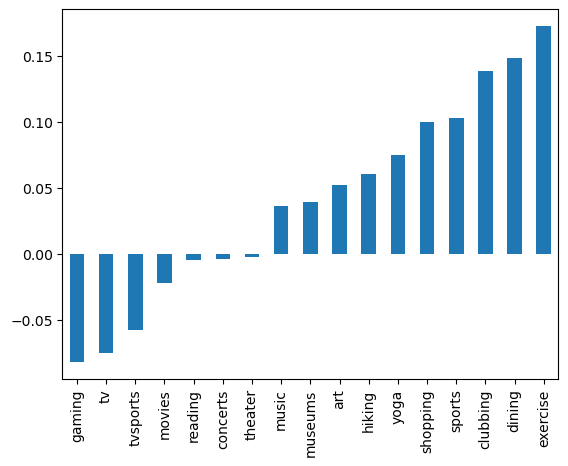

In [44]:
#extract 1st row from positive rate and drop iid in positive rate
interests.corr()['positive_rate'].drop(['iid', 'positive_rate']).sort_values().plot(kind='bar')


In [45]:
profiles = profiles.merge( dates.groupby('iid').agg({'field_cd' : find_mode}).reset_index(),
               on='iid',
               how='left')


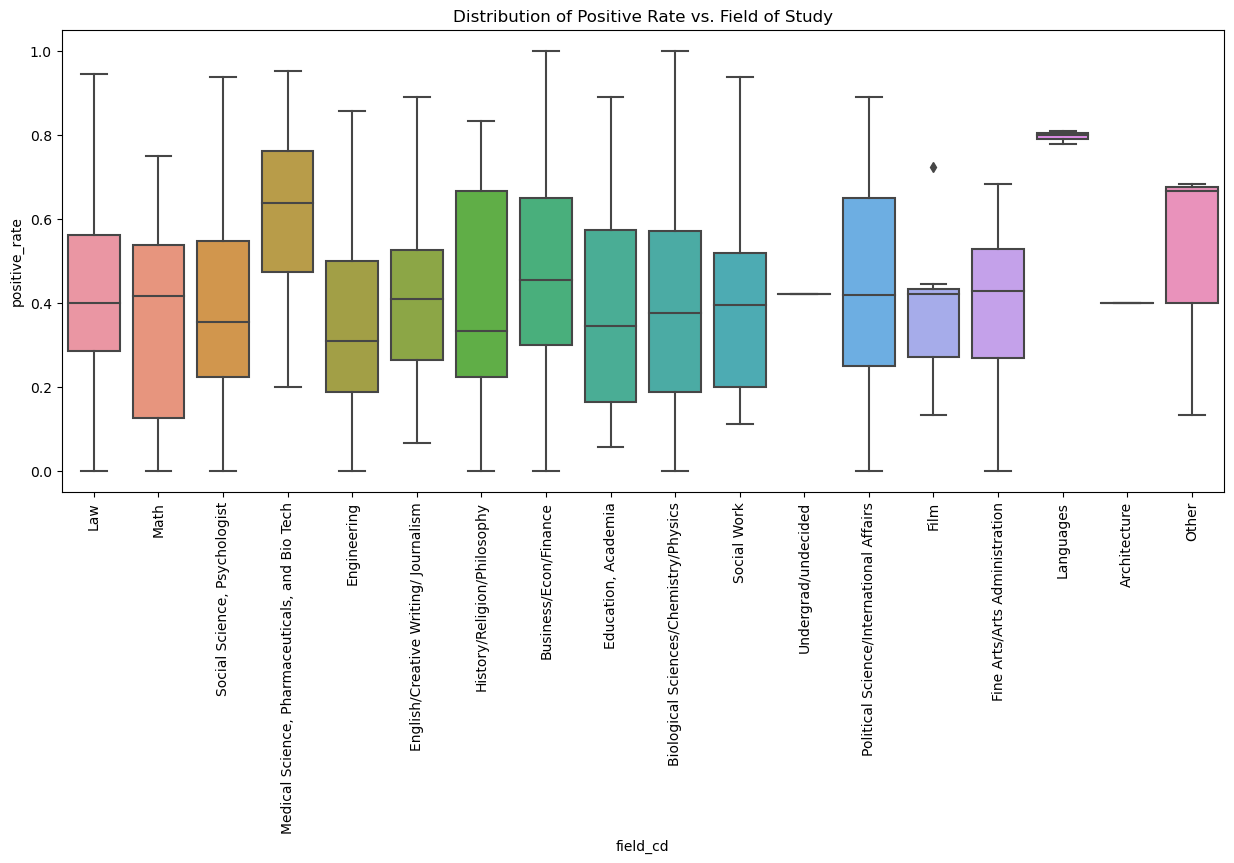

In [46]:

x_ticks = ['Law',
'Math',
'Social Science, Psychologist',
'Medical Science, Pharmaceuticals, and Bio Tech', 
'Engineering',  
'English/Creative Writing/ Journalism', 
'History/Religion/Philosophy', 
'Business/Econ/Finance', 
'Education, Academia', 
'Biological Sciences/Chemistry/Physics',
'Social Work', 
'Undergrad/undecided', 
'Political Science/International Affairs',
'Film',
'Fine Arts/Arts Administration',
'Languages',
'Architecture',
'Other']


fig, ax = plt.subplots(figsize=(15, 6))  #setting up plot 
sns.boxplot(x='field_cd', y='positive_rate', data=profiles, ax=ax)
plt.xticks(ticks=range(0, 18), labels = x_ticks, rotation=90)  #change xticks to x_ticks and rotate
plt.title('Distribution of Positive Rate vs. Field of Study')
plt.show()



